In [1]:
import numpy as np
import pandas as pd

# Import Data

In [18]:
df = pd.read_csv("data/customer.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Tentukan jumlah cluster

In [3]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

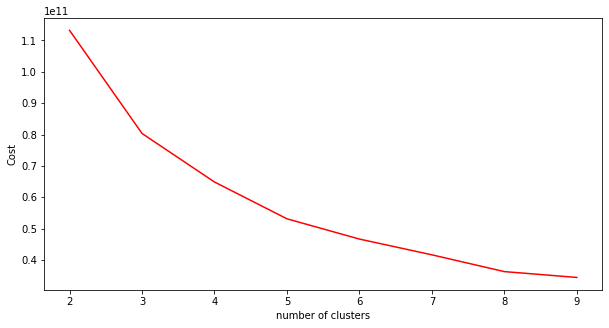

In [7]:
score = []
for k in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=k)
    model.fit(df, categorical=[0, 1])    
    score.append(model.cost_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), score, 'r-')
plt.ylabel("Cost")
plt.xlabel("number of clusters");

# Training

In [8]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0, 1])

In [11]:
df_pred = df.copy()
df_pred["cluster"] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


# Analisis Cluster -> apa makna dari masing" cluster

In [12]:
num, cat = model.cluster_centroids_

In [20]:
df_cat = pd.DataFrame(cat, columns=df.columns[:2])
df_num = pd.DataFrame(num, columns=df.columns[2:])
df_cat.join(df_num)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576,1137.496970
1,2,3,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000,2252.020000
2,1,3,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667,3049.466667


cluster 0: orang hemat / jarang belanja di kita<br>
cluster 1: typical orang yang suka beli Milk, Grocery, Detergents_Paper<br>
cluster 2: customer yang suka beli fresh dan frozen food

In [22]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64